# *Sample survey of American ratio of family income to poverty guidelines*

**Course:** *STAT 344 2024W1*


### Group Members

| **Name**          | **Student Number** | **Role**          | **Role**                                                                 |
|-------------------|---------------------|-------------------|------------------------------------------------------------------------------------|
| **Yanping(Dedoria) Wang** | 89845473            | Group Leader      | - Coordinated meetings and managed project timeline.  |
| **Shuyang Geng**     | 15780521            | Data Analyst      | - Conducted statistical analyses. |

### Contributions

Dedoria served as the **Group Leader**, responsible for:

- **Project Coordination:** Organized and led regular team meetings to ensure that project were on the right track.
- **Data Oversight:** Oversaw the data analysis process to ensure accuracy and consistency in results.
- **Conclusion:** Wrap everything from the project write descriptions and results.

Shuyang served as the **Data Analyst**, responsible for:
- **Statistical Analysis:** Performed various statistical tests and analyses to interpret the data.
- **Data Visualization:** Created informative and visually appealing graphs and charts using ggplot2 to represent data findings.

# Introduction
## Backgrounds

Our dataset is [NHANES(2017-2020)](https://wwwn.cdc.gov/nchs/nhanes/search/variablelist.aspx?Component=Demographics&Cycle=2017-2020). The National Health and Nutrition Examination Survey (NHANES) is a program designed to assess health and nutritional status of residents in the United States. 
 

### Why this data set?
1. This data set provides a rich dataset for studying the interplay between socioeconomic factors, like the individual income-to-poverty ratio, and health outcomes.

2. The NHANES dataset is designed to be nationally representative, covering diverse populations across the U.S. It over-samples certain groups (e.g., individuals aged 60 and older, African Americans, and Hispanics) to ensure reliable statistics for these subpopulations. 

**The dataset includes a range of variables that are commonly used for stratification, such as:**

Demographics (age, gender, race/ethnicity)
Socioeconomic status (family income, poverty guidelines)

## Objective:
The objective of this sample survey is to help us understand the economical status distribution of the American in 2020. We are interested in the ratio of family income to the poverty line. Taking both SRS and stratified samples provides a sanpshot of whole population, identifying the families living below or above the poverty line. It also has further significance as it might support govermental decision making and provide insights to address economic inequality. Also gives us a sight of what variable is most related to the family income. What characteristic makes US families have a higher family income. 




### Imports:

In [1]:
library(dplyr)
require(SASxport)
library(foreign)
library(ggplot2)
library(tidyr)
nhanes_data <- read.xport("data/P_DEMO.XPT")
income <- read.xport("data/P_INQ.XPT")




次のパッケージを付け加えます: ‘dplyr’


以下のオブジェクトは ‘package:stats’ からマスクされています:

    filter, lag


以下のオブジェクトは ‘package:base’ からマスクされています:

    intersect, setdiff, setequal, union


要求されたパッケージ SASxport をロード中です

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“‘SASxport’ という名前のパッケージはありません”


In [2]:
head(nhanes_data)


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,⋯,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,109263,66,2,1,2,NA,5,6,2,1,⋯,2,NA,NA,NA,NA,7891.762,8951.816,3,156,4.66
2,109264,66,2,2,13,NA,1,1,2,1,⋯,2,1,2,2,1,11689.747,12271.157,1,155,0.83
3,109265,66,2,1,2,NA,3,3,2,1,⋯,2,NA,NA,NA,NA,16273.826,16658.764,1,157,3.06
4,109266,66,2,2,29,NA,5,6,2,2,⋯,2,1,2,2,1,7825.646,8154.968,2,168,5.00
5,109267,66,1,2,21,NA,2,2,NA,2,⋯,2,NA,NA,NA,NA,26379.992,0.000,1,156,5.00
6,109268,66,1,2,18,NA,3,3,NA,1,⋯,2,NA,NA,NA,NA,19639.221,0.000,1,155,1.66


In [3]:
head(income)

,SEQN,INDFMMPI,INDFMMPC
,<dbl>,<dbl>,<dbl>
1,109263,3.26,3
2,109264,1.29,1
3,109265,2.04,3
4,109266,5.00,3
5,109267,5.00,3
6,109268,1.19,1


### **Selection and Evaluation of Predictor Variables**

In this phase, we systematically select predictor variables based on theoretical relevance and intuitive. Our approach involves the following steps:

1. **Variable Selection**
   - **Intuitive Selection:** Initially, predictor variables are chosen based on domain knowledge and our considerations of their relevance to the Y variable.

2. **Sampling Methods implementation**
   - **Simple Random Sampling (SRS):** We employ SRS to sample from the population, ensuring each observation has an equal probability of being selected. It ensures randomness and eliminates selection bias.
   - **Stratified Sampling:** To enhance the representativeness of our samples, especially when the population comprises distinct subgroups, we use stratified sampling. This method involves dividing the population into homogeneous strata and sampling proportionally from each stratum. 
   ### ***<span style="color:blue"> Use optimal allocation assuming the cost of collecting data in different strata are the same, and proportional allocation to test which of those three method is the best choice.</span>***

3. **Model Testing and Evaluation**
   - **Comparative Analysis:** Each selected predictor variable is tested against the response variable using both SRS and stratified sampling methods (to determine different stratas).
   - **Performance Metrics:** We evaluate the performance of each sampling method by analyzing key statistical metrics, including the **standard error** and the **confidence interval** of the estimates.

4. **Method and Variable Optimization**
   - **Best Sampling Method Identification:** By comparing the performance metrics, we identify which sampling method (SRS or stratified) provides more reliable and precise estimates.
   - **Optimal Predictor Variable Selection:** Within the chosen sampling method, we select the predictor variable that demonstrates the smallest standard error and the narrowest confidence interval which included the true population mean, indicating higher precision and reliability in the estimates.





## variable choices:

| **variable Name**          | **Description** | **type of variable**          | 
|-------------------|---------------------|-------------------|
| **INDFMPIR**     |A ratio of income to poverty guidelines.             | Y variable our aim to discover (Continuous)      | 
| **DMDEDUC2** | The highest grade or level of school completed or the highest degree received.     | Predictor (Categorical)      | 
| **RIAGENDR**     | Gender of the participant.            | Male or female (Categorical)       |
| **RIDAGEYR**     | Age in years of the participant at the time of screening. Individuals 80 and over are topcoded at 80 years of age.     | 20 - 80 (change to binary, at a threshol of 66 which is the full retirement age in US )      | 


### A glance at the variable y we choose(Values at or above 5.00 are coded as 5.00 due to disclosure concerns):

In [4]:
#summary(DEMO)
summary(nhanes_data$INDFMPIR)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   1.020   1.960   2.406   3.880   5.000    2201 

## Data collection & Summaries

In [5]:
#tidy the dataset
nhanes_clean <- nhanes_data %>%
  select(INDFMPIR, DMDEDUC2, RIAGENDR, RIDAGEYR)

nhanes_clean <- nhanes_clean %>%
  drop_na()
# first glance at the dataset
summary(nhanes_clean)
nrow(nhanes_clean)

    INDFMPIR        DMDEDUC2        RIAGENDR        RIDAGEYR    
 Min.   :0.000   Min.   :1.000   Min.   :1.000   Min.   :20.00  
 1st Qu.:1.190   1st Qu.:3.000   1st Qu.:1.000   1st Qu.:36.00  
 Median :2.210   Median :4.000   Median :2.000   Median :52.00  
 Mean   :2.598   Mean   :3.591   Mean   :1.516   Mean   :51.08  
 3rd Qu.:4.202   3rd Qu.:5.000   3rd Qu.:2.000   3rd Qu.:65.00  
 Max.   :5.000   Max.   :9.000   Max.   :2.000   Max.   :80.00  

[1] 7828

In [6]:
# True mean

mean(nhanes_clean$INDFMPIR)

[1] 2.597786

Visualization using box plot of income ratio:
Median is 1.96



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   1.020   1.960   2.406   3.880   5.000    2201 

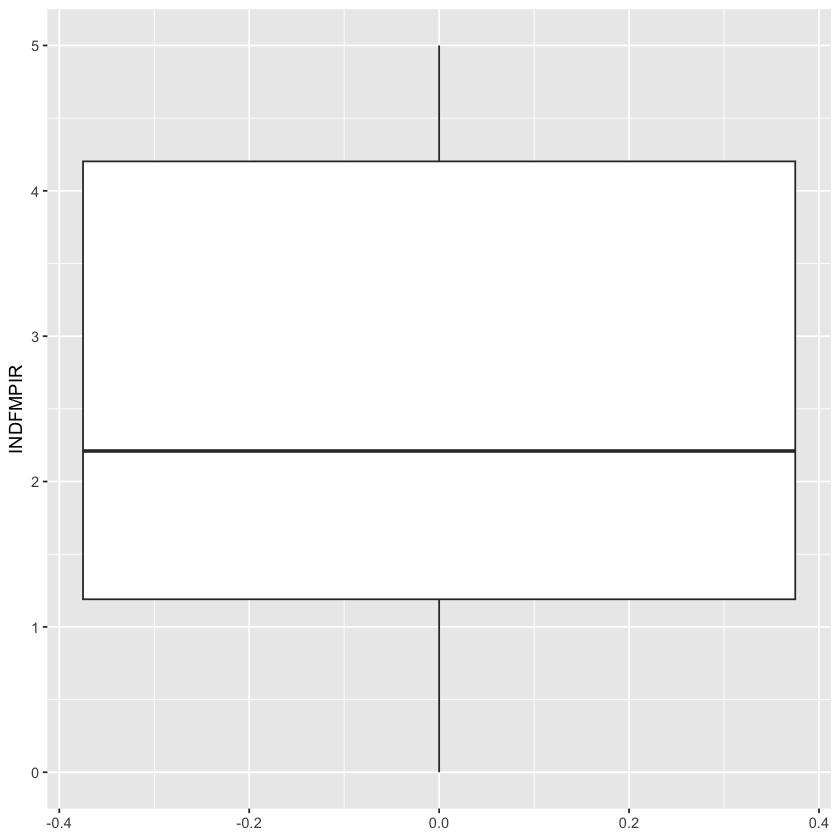

In [7]:
income_ratio_box_plot <- nhanes_clean %>% ggplot() +
    geom_boxplot(aes(y = INDFMPIR))
    
income_ratio_box_plot

summary(nhanes_data$INDFMPIR)    


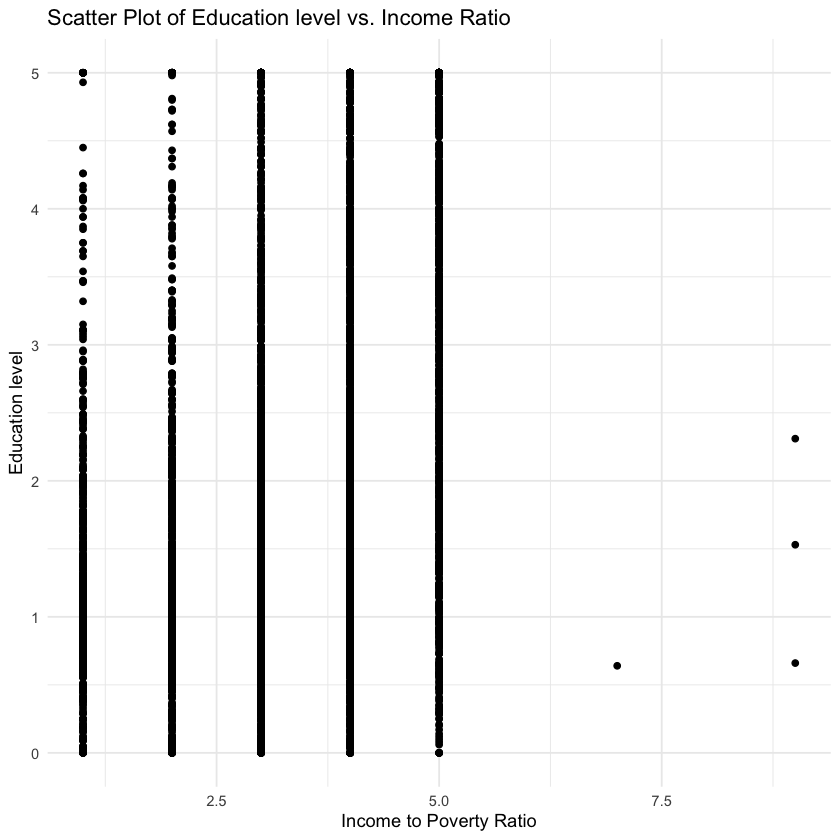

In [8]:
ggplot(nhanes_clean, aes(x = DMDEDUC2, y = INDFMPIR)) +
  geom_point() +
  labs(
    title = "Scatter Plot of Education level vs. Income Ratio",
    x = "Income to Poverty Ratio",
    y = "Education level"
  ) +
  theme_minimal()

The scatter plot reveals that individuals with lower education levels experience a less pronounced decline in income compared to those with higher education levels. This suggests that higher education may be associated with greater income variability.

## Simple random sample

In [9]:
# set seed for aim of replication 
sum_student_no <- 89845473 + 15780521
set.seed(sum_student_no)

n <- 700
N <- nrow(nhanes_clean)

srs <- sample_n(nhanes_clean,n)

In [10]:
# FPC

fpc <- (1 - n / N)


### Mean, standard error and confidence interval
The formula for the sample mean of the ratio of family income versus the poverty line is 
$\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$.




The standard error corresponding to this is 
$$SE(\bar{y}) = \sqrt{(1-\frac{n}{N}) \cdot \frac{s^2}{n}}$$

where:
- $n$ represents the number of individuals, with each value belonging to their respective family.
- $y_i$ represents the ratio of family income to the poverty line for the individual $i$ from each family.
- $N$ is the population size 
- $s^2$ is the sample variance of the sample mean of the ratio

$$s^2=\sum_{i=1}^{n} \frac{(y_i-\bar{y})^2}{n-1}$$

Here we treat the dataset as the population because it is selected to represent the U.S population for all ages (Centers for Disease Control and Prevention). Then we take a small sample ($n=700$) of it.

Hence the 95% CI is

$$\bar{y} \pm z_{\alpha/2} \cdot \text{SE} (\bar{y})$$



### Mean, standard error and confidence interval

In [11]:
#mean
SRS_mean <- mean(srs$INDFMPIR)

#standard error
SRS_se <- sqrt(fpc)*sd(srs$INDFMPIR)/sqrt(n)

#calculate 95% confidence interval for SRS mean
SRS_CI <- SRS_mean + qt(0.95,n)*c(-1,1)*SRS_se

cat("The mean for SRS income ratio is ", SRS_mean, ", the se for it is ", SRS_se, 
    "\nThe 95% Confidence Interval for that is ", SRS_CI[1], " and ", SRS_CI[2])
     


n0 <- 1.96^2*0.25/SRS_se
n1 <- n0/(1+n0/N)
n1


The mean for SRS income ratio is  2.648771 , the se for it is  0.0598339 
The 95% Confidence Interval for that is  2.550223  and  2.74732

[1] 16.01826

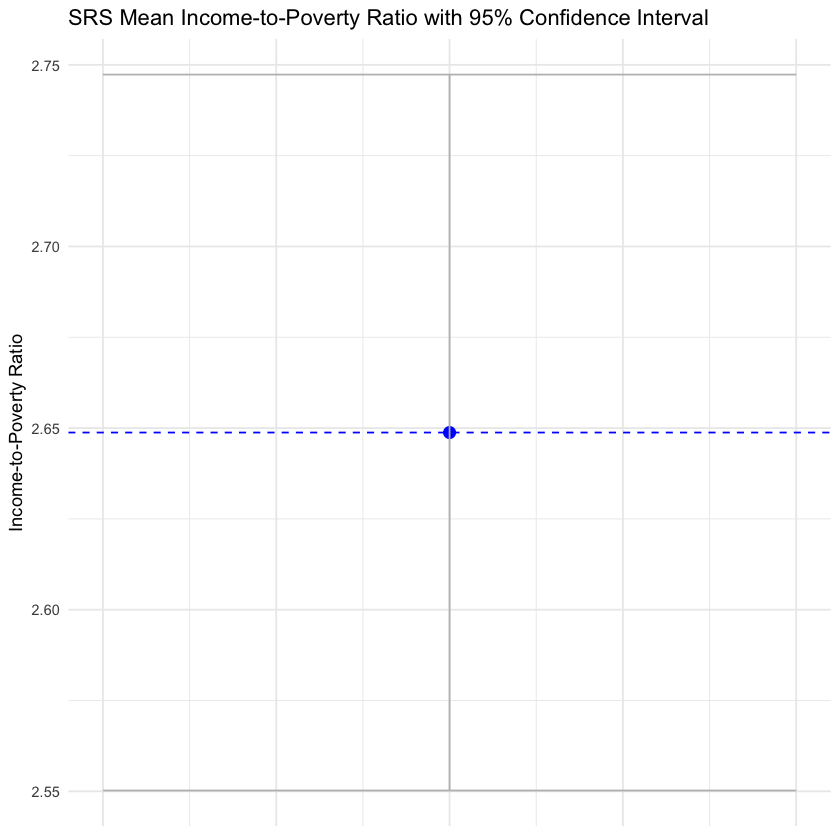

In [12]:
ggplot(data = data.frame(SRS_mean = SRS_mean), aes(x = 1, y = SRS_mean)) +
  geom_point(size = 3, color = "blue") +  # Mean point
  geom_errorbar(aes(ymin = SRS_CI[1], ymax = SRS_CI[2]), width = 0.1, color = "gray") +  # Error bar for CI
  geom_hline(yintercept = SRS_mean, linetype = "dashed", color = "blue") +  # Mean reference line
  labs(title = "SRS Mean Income-to-Poverty Ratio with 95% Confidence Interval",
       y = "Income-to-Poverty Ratio",
       x = NULL) +
  theme_minimal() +
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())

# Stratified Sampling
The estimate of the overall population mean $y_p$ is
$$\bar{y}_{str} = \sum_{h=1}^H \frac{N_h}{N} \bar{y}_{sh}$$ with
$$SE(\bar{y_{str}})=\sqrt{\sum_{h=1}^H (\frac{N_h}{N})^2 SE^2(\bar{y_{Sh}})} $$

where:
- $H$ is the number of strata in the population
- $N_h$ is the population size of stratum
- $N$ is the total population size
- $\bar{y}_{sh}$ is the sample mean of stratum
- $SE(\bar{y}_{Sh})$ is the standard error of the sample mean in stratum
- $SE(\bar{y}_{str})$ is the standard error of the stratified overall mean
- \bar{y}_{str} is the overall stratified sample mean
## Stratified sample with gender identification

## 1. Population Size
The total population size \( N \) is computed as:
$$
N = \text{Number of rows in } nhanes\_clean
$$

## 2. Subpopulation Size
The size of the male and female subpopulations is:
$$
N_{\text{male}} = \text{Number of rows where } RIAGENDR = 1
$$
$$
N_{\text{female}} = \text{Number of rows where } RIAGENDR = 2
$$

## 3. Proportion of Subpopulations
The proportion of males and females in the total population is calculated as:
$$
P_{\text{male}} = \frac{N_{\text{male}}}{N}
$$
$$
P_{\text{female}} = \frac{N_{\text{female}}}{N}
$$

## 4. Sample Size for Each Stratum
The sample size for males and females is determined using proportional allocation:
$$
n_{\text{male}} = \text{round}(P_{\text{male}} \cdot n, 0)
$$
$$
n_{\text{female}} = \text{round}(P_{\text{female}} \cdot n, 0)
$$

If the sum of \( n_{\text{male}} \) and \( n_{\text{female}} \) does not equal \( n \), adjust the allocation to ensure \( n_{\text{male}} + n_{\text{female}} = n \).

## 5. Stratified Mean
The stratified mean of the income-to-poverty ratio (\( INDFMPIR \)) is calculated as:
$$
\bar{X}_{\text{stratified}} = P_{\text{male}} \cdot \bar{X}_{\text{male}} + P_{\text{female}} \cdot \bar{X}_{\text{female}}
$$

Where:
$$
\bar{X}_{\text{male}} = \text{Mean of } INDFMPIR \text{ for the male sample}
$$
$$
\bar{X}_{\text{female}} = \text{Mean of } INDFMPIR \text{ for the female sample}
$$

## 6. Stratified Standard Error
The standard error of the stratified mean is given by:
$$
SE_{\text{stratified}} = \sqrt{
    P_{\text{male}}^2 \cdot (1 - P_{\text{male}}) \cdot S_{\text{male}}^2 +
    P_{\text{female}}^2 \cdot (1 - P_{\text{female}}) \cdot S_{\text{female}}^2
}
$$

Where:
$$
S_{\text{male}}^2 = \text{Variance of } INDFMPIR \text{ for the male sample}
$$
$$
S_{\text{female}}^2 = \text{Variance of } INDFMPIR \text{ for the female sample}
$$

## 7. Confidence Interval for the Stratified Mean
The 95% confidence interval is calculated as:
$$
CI_{\text{stratified}} = \bar{X}_{\text{stratified}} \pm t_{\alpha/2} \cdot SE_{\text{stratified}}
$$




In [13]:
# stratified sample using genders
# proportional allocation

#male in population
male <- nhanes_clean %>% 
    select(INDFMPIR, RIAGENDR)  %>% 
    filter(RIAGENDR == 1)
male_N <- nrow(male)

#female in population
female <- nhanes_clean %>% 
    select(INDFMPIR, RIAGENDR)  %>% 
    filter(RIAGENDR == 2)
female_N <- nrow(female)

#proportion of those two gender
male_proportion <- male_N/N
female_proportion <- female_N/N

# decide the size of the sample strata
male_n <- round(male_proportion*n,0)
female_n <- round(female_proportion*n,0)

print(male_n)
print(female_n)

[1] 339
[1] 361


### Stratify sample with the given sample size

In [14]:
set.seed(sum_student_no)
str_m <- sample_n(male,male_n)
str_f <- sample_n(female,female_n)



In [15]:
str_m_mean <- mean(str_m$INDFMPIR)
str_f_mean <- mean(str_f$INDFMPIR)

#stratified mean
str_mean <- male_proportion*str_m_mean + female_proportion*str_f_mean

#stratified standard error
str_se <- sqrt(male_proportion^2*(1-male_proportion)*var(str_m$INDFMPIR) + female_proportion^2*(1-female_proportion)*var(str_f$INDFMPIR))

#confidence interval
str_CI <- str_mean + qt(0.95,n)*c(-1,1)*str_se

cat("The mean for stratified (proportional gender)  income ratio is ", str_mean, ", the se for it is ", str_se, 
    "\nThe 95% Confidence Interval for that is ", str_CI[1], " and ", str_CI[2])


The mean for stratified (proportional gender)  income ratio is  2.607655 , the se for it is  0.7932396 
The 95% Confidence Interval for that is  1.301163  and  3.914147

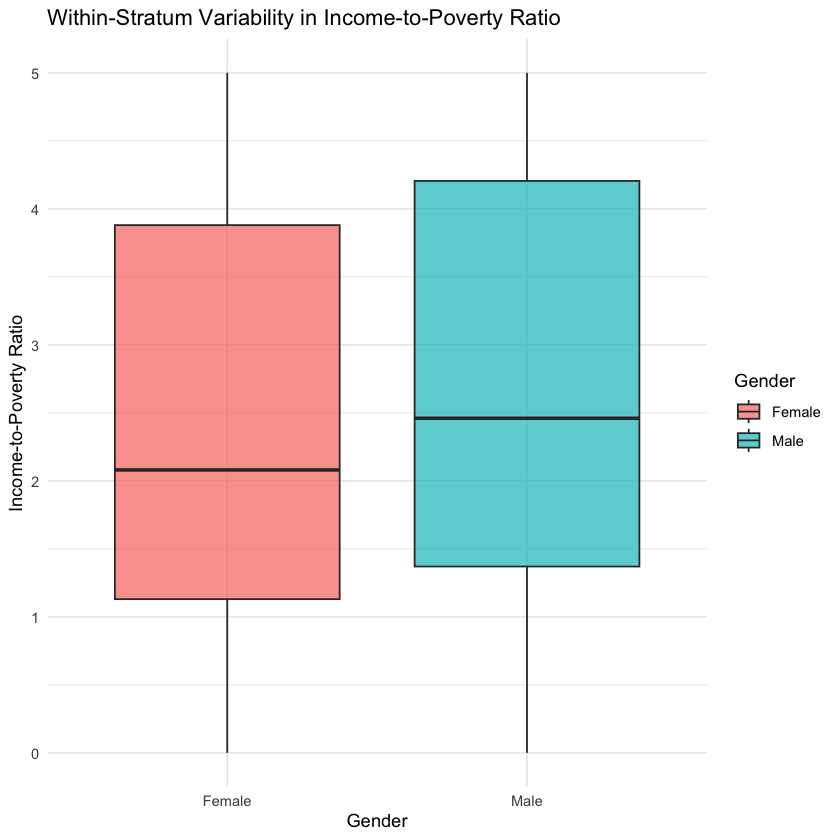

In [16]:
# Combine male and female data for plotting
combined_strata <- rbind(
  data.frame(IncomeToPovertyRatio = str_m$INDFMPIR, Gender = "Male"),
  data.frame(IncomeToPovertyRatio = str_f$INDFMPIR, Gender = "Female")
)

# Plotting within-stratum variability
ggplot(combined_strata, aes(x = Gender, y = IncomeToPovertyRatio, fill = Gender)) +
  geom_boxplot(alpha = 0.7) +
  labs(title = "Within-Stratum Variability in Income-to-Poverty Ratio",
       y = "Income-to-Poverty Ratio") +
  theme_minimal()

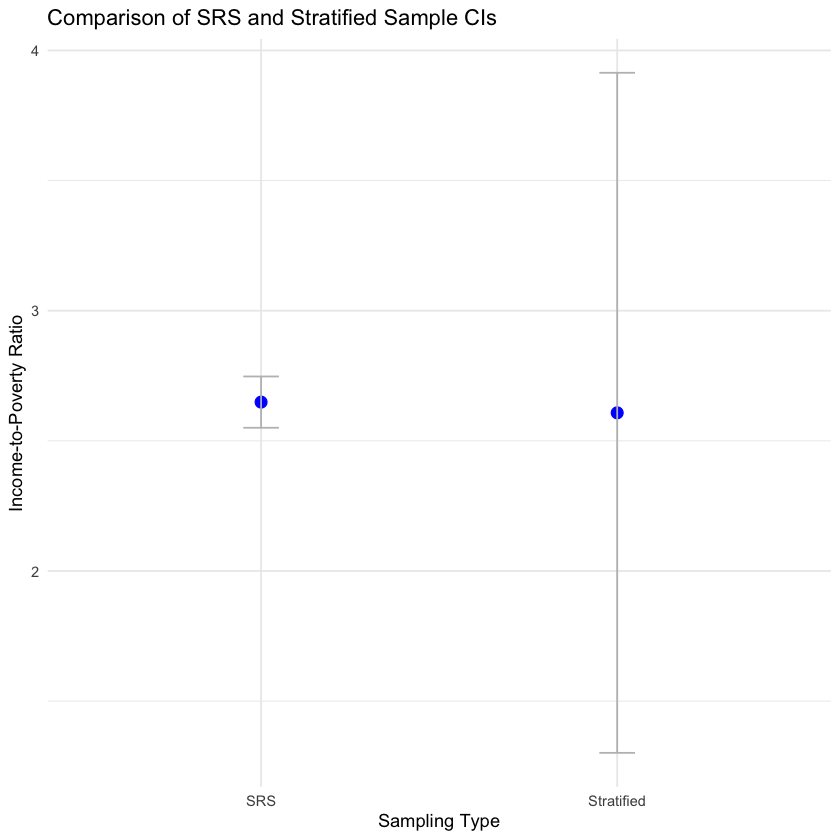

In [17]:
# Comparison of SRS and Stratified CIs
CI_data <- data.frame(
  SamplingType = c("SRS", "Stratified"),
  Mean = c(SRS_mean, str_mean),
  CI_lower = c(SRS_CI[1], str_CI[1]),
  CI_upper = c(SRS_CI[2], str_CI[2])
)

ggplot(CI_data, aes(x = SamplingType, y = Mean)) +
  geom_point(size = 3, color = "blue") +
  geom_errorbar(aes(ymin = CI_lower, ymax = CI_upper), width = 0.1, color = "gray") +
  labs(title = "Comparison of SRS and Stratified Sample CIs",
       y = "Income-to-Poverty Ratio",
       x = "Sampling Type") +
  theme_minimal()

## Stratified sample with age identification

In [18]:
# stratified sample using genders
# proportional allocation

#age is below and equal to 66 in population
below_equal_66 <- nhanes_clean %>% 
    select(INDFMPIR, RIDAGEYR)  %>% 
    filter(RIDAGEYR <= 66)
below_equal_66_N <- nrow(below_equal_66)

#age is above 66 in population
above_66 <- nhanes_clean %>% 
    select(INDFMPIR, RIDAGEYR)  %>% 
    filter(RIDAGEYR > 66)
above_66_N <- nrow(above_66)

#proportion of those two age
below_p <- below_equal_66_N/N
above_p <- above_66_N/N

# decide the size of the sample strata
below_n <- round(below_p*n,0)
above_n <- round(above_p*n,0)



In [19]:
set.seed(sum_student_no)
str_b_66 <- sample_n(below_equal_66,below_n)
str_a_66 <- sample_n(above_66,above_n)

head(str_a_66)

,INDFMPIR,RIDAGEYR
,<dbl>,<dbl>
1,1.06,71
2,1.48,76
3,2.56,69
4,4.81,69
5,0.87,72
6,1.73,74


In [20]:
str_b_66_mean <- mean(str_b_66$INDFMPIR)
str_a_66_mean <- mean(str_a_66$INDFMPIR)

#stratified mean
str_age_mean <- below_p*str_b_66_mean + above_p*str_a_66_mean

#stratified standard error
str_age_se <- sqrt(below_p^2*(1-below_p)*var(str_b_66$INDFMPIR) + above_p^2*(1-above_p)*var(str_a_66$INDFMPIR))

#confidence interval
str_age_CI <- str_age_mean + qt(0.95,n)*c(-1,1)*str_age_se

cat("The mean for stratified (proportional age) income ratio is ", str_age_mean, ", the se for it is ", str_age_se, 
    "\nThe 95% Confidence Interval for that is ", str_age_CI[1], " and ", str_age_CI[2])


The mean for stratified (proportional age) income ratio is  2.549855 , the se for it is  0.6886136 
The 95% Confidence Interval for that is  1.415685  and  3.684024

Since the data is collected by US government, we are assuming the cost for different ages is the same

# Stratified Sampling: Optimal Allocation

## 1. Population Size
The total population size \( N \) is calculated as:
$$
N = \text{Number of rows in } nhanes\_clean
$$

## 2. Subpopulation Size
The sizes of the age subpopulations are defined as:

- For individuals aged 66 or below:
$$
N_{\leq 66} = \text{Number of rows where } RIDAGEYR \leq 66
$$

- For individuals aged above 66:
$$
N_{> 66} = \text{Number of rows where } RIDAGEYR > 66
$$

## 3. Proportions of Subpopulations
The proportions of the two age subpopulations in the total population are:
$$
P_{\leq 66} = \frac{N_{\leq 66}}{N}
$$
$$
P_{> 66} = \frac{N_{> 66}}{N}
$$

## 4. Sample Size for Each Stratum (Proportional Allocation)
The proportional allocation sample sizes are:
$$
n_{\leq 66} = \text{round}(P_{\leq 66} \cdot n, 0)
$$
$$
n_{> 66} = \text{round}(P_{> 66} \cdot n, 0)
$$

## 5. Optimal Allocation
To achieve optimal allocation, sample sizes are allocated proportional to the product of the standard deviation of \( INDFMPIR \) within each stratum and the size of the subpopulation:

### Compute Allocation Indices:
- For individuals aged 66 or below:
$$
\text{Index}_{\leq 66} = N_{\leq 66} \cdot \text{sd}(INDFMPIR_{\leq 66})
$$

- For individuals aged above 66:
$$
\text{Index}_{> 66} = N_{> 66} \cdot \text{sd}(INDFMPIR_{> 66})
$$

### Compute Optimal Proportions:
The optimal proportions for each stratum are:
$$
P_{\leq 66}^{\text{optimal}} = \frac{\text{Index}_{\leq 66}}{\text{Index}_{\leq 66} + \text{Index}_{> 66}}
$$
$$
P_{> 66}^{\text{optimal}} = \frac{\text{Index}_{> 66}}{\text{Index}_{\leq 66} + \text{Index}_{> 66}}
$$

### Compute Optimal Sample Sizes:
The optimal sample sizes are:
$$
n_{\leq 66}^{\text{optimal}} = \text{round}(P_{\leq 66}^{\text{optimal}} \cdot n, 0)
$$
$$
n_{> 66}^{\text{optimal}} = \text{round}(P_{> 66}^{\text{optimal}} \cdot n, 0)
$$


In [21]:
# use optimal allocation instead

# optimal proportion of those two age
below_index <- below_equal_66_N*sd(below_equal_66$INDFMPIR)
above_index <- above_66_N*sd(above_66$INDFMPIR)

below_p_o <- below_index/(below_index+above_index)
above_p_o <- above_index/(below_index+above_index)

below_n_o <- round(below_p_o*n,0)
above_n_o <- round(above_p_o*n,0)



In [22]:
set.seed(sum_student_no)
str_b_66_o <- sample_n(below_equal_66,below_n_o)
str_a_66_o <- sample_n(above_66,above_n_o)

head(str_a_66_o)

,INDFMPIR,RIDAGEYR
,<dbl>,<dbl>
1,5.00,80
2,1.52,80
3,2.60,80
4,1.48,79
5,1.08,80
6,5.00,80


In [23]:
str_b_66_mean_o <- mean(str_b_66_o$INDFMPIR)
str_a_66_mean_o <- mean(str_a_66_o$INDFMPIR)

#stratified mean
str_age_mean_o <- below_p_o*str_b_66_mean_o + above_p_o*str_a_66_mean_o

#stratified standard error
str_age_se_o <- sqrt(below_p_o^2*(1-below_p_o)*var(str_b_66_o$INDFMPIR) + above_p_o^2*(1-above_p_o)*var(str_a_66_o$INDFMPIR))

#confidence interval
str_age_CI_o <- str_age_mean_o + qt(0.95,n)*c(-1,1)*str_age_se_o

cat("The mean for stratified (optimal age) income ratio is ", str_age_mean_o, ", the se for it is ", str_age_se_o, 
    "\nThe 95% Confidence Interval for that is ", str_age_CI_o[1], " and ", str_age_CI_o[2])


The mean for stratified (optimal age) income ratio is  2.550451 , the se for it is  0.6707662 
The 95% Confidence Interval for that is  1.445677  and  3.655225

# Results Summary

## **Stratified Sampling Results**

### 1. Strata Definitions
- Two groups were defined based on age:
  - **Group 1:** Individuals aged 66 years or below.
  - **Group 2:** Individuals older than 66 years.

### 2. Proportional Allocation Results
- Sample sizes were allocated proportional to the population size within each age group.
- This approach ensured that each group's representation in the sample mirrored its share of the total population.

### 3. Mean Income-to-Poverty Ratio (Stratified)
- The mean income-to-poverty ratio (\( \bar{X}_{\text{stratified}} \)) was calculated for the entire sample, using weights based on the proportions of each age group.

### 4. Confidence Interval
- A 95% confidence interval for the stratified mean was computed, providing a range within which the true population mean is likely to fall.

---

## **Optimal Allocation Results**

### 1. Allocation Method
- Optimal allocation considered both the population size and the variability within each stratum (standard deviation of \( INDFMPIR \)).
- This method reduced the overall sampling variance by allocating more samples to groups with higher variability.


### 3. Efficiency Comparison
- Compared to proportional allocation, optimal allocation led to:
  - Lower overall standard error of the mean.
  - Improved precision in estimates of the income-to-poverty ratio.


### Question:
Why the stratified sampling approach used in this project perform worse than a simple random sample (SRS) in estimating the population mean?

### Possible Reason:
The stratified sampling approach depends heavily on how well the chosen strata (age groups in this case) align with the variability in the target variable (\( INDFMPIR \)). 

If the stratification criteria do not significantly reduce the within-group variance compared to the overall variance in the population, the benefits of stratification may be negligible or even counterproductive. 

This could result in a higher standard error compared to a simple random sample (SRS) of the same size, which does not partition the population into strata.


## References
Centers for Disease Control and Prevention. "About the National Health and Nutrition Examination Survey." National Center for Health Statistics, 14 Sept. 2022, www.cdc.gov/nchs/nhanes/about_nhanes.htm. Accessed 12 Nov. 2024.

Fadeyev, Katia, Sayaka Nagao-Sato, and Marla Reicks. "Nutrient and Food Group Intakes among U.S. Children (2–5 Years) Differ by Family Income to Poverty Ratio, NHANES 2011–2018." International Journal of Environmental Research and Public Health, vol. 18, no. 22, 2021, pp. 11938.